# Project description

The aim of this project is to build machine learning classifiers based on the [Adult Dataset](https://archive.ics.uci.edu/ml/datasets/adult). kNN, random forest, classification trees and a Muli-Layer Perceptron model will be trained to predict whether a person income is more than US$50k/year or not. The accuracy, precision and recall for each classifier will be compared.

The Adult Dataset consists of 48842 observations (with missing data) and 14 features. The UCI Repository already provides files for the training and testing sets (2/3 and 1/3 of total observations, respectively).

## Tasks

Practice: Classifiers for the Adult Dataset

1. Get the dataset Adult (either in the UCI Repository or in Kaggle).

2. Analyze features, missing data, and overall characteristics of the dataset (using tools in sklearn). Select features, discretize numerical features, handle missing data. 

3. Build a kNN classifier to predict class variable ">50k" (that is, whether person gets more than US$50k/year or not). Select the hyperparameter using cross-validation; test the final classifier using a holdout dataset.

4. Repeat (3) using either a classification tree or a random forest.

5. Present accuracy, precision and recall for the best classifier in (3) and in (4).

6. Repeat (3) using a Multi-Layer Perceptron. 

# Exploratory analysis

In this step, we will understand the dataset, check for existing missing data, outliers in countinuous variables and produce exploratory plots.

In [66]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import rcParams
import seaborn as sns


# from skleaerrn import metrics
# from pandas.tools.plotting import scatter_matrix
# import matplotlib.pyplot as plt
# from sklearn import model_selection
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn import preprocessing
# from sklearn.svm import SVC
# from sklearn.cross_validation import train_test_split
# from sklearn import tree

In [67]:
# Loading the test dataset
df_train = pd.read_csv('./dataset/adult_data.csv', header=None)

In [68]:
df_train.shape # 32561 observations and 14 features 

(32561, 15)

In [69]:
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [70]:
# Loading the training dataset
df_test = pd.read_csv('./dataset/adult_test.csv', header=None)

In [71]:
df_test.shape # 16281 observations and 14 features

(16281, 15)

In [72]:
df_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


Although UCI Repository already provides the dataset splited into training and testing, in this project the two subsets will be concatenated and splited again after the preprocessing steps.

In [73]:
# The dataset will be splited into training and test after the preprocessing step
df = pd.concat([df_train, df_test])
df.shape

(48842, 15)

In [74]:
# Change colnames
df = df.rename(columns={
    0:"age",
    1:"workclass",
    2:"fnlwgt",
    3:"education",
    4:"education-num",
    5:"matrial-status",
    6:"occupation",
    7:"relationship",
    8:"race",
    9:"sex",
    10:"capital-gain",
    11:"capital-loss",
    12:"hours-per-week",
    13:"native-country",
    14:"income"
})

In [75]:
# Verify the class of each feature
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
matrial-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

The dataset has 6 numerical attributes (age, fnlwgt, education-num, capital-gain, capital-loss and hours-per-week) and 8 categorial attributes (workclass, education, matrial-status, occupation, relationship, race, sex, native-country and income)

Let's explore the cateogircal attributes, verifying their levels and respectively frequency


In [76]:
[print(f"\n## {column} ##\n{df[column].value_counts(normalize=True)*100}") for column in df.select_dtypes(include=['object'])]


## workclass ##
Private             69.419762
Self-emp-not-inc     7.907129
Local-gov            6.420703
?                    5.730724
State-gov            4.055935
Self-emp-inc         3.470374
Federal-gov          2.931903
Without-pay          0.042996
Never-worked         0.020474
Name: workclass, dtype: float64

## education ##
HS-grad         32.316449
Some-college    22.271815
Bachelors       16.430531
Masters          5.439990
Assoc-voc        4.219729
11th             3.709922
Assoc-acdm       3.277917
10th             2.843864
7th-8th          1.955284
Prof-school      1.707547
9th              1.547848
12th             1.345154
Doctorate        1.216166
5th-6th          1.042136
1st-4th          0.505712
Preschool        0.169936
Name: education, dtype: float64

## matrial-status ##
Married-civ-spouse       45.819172
Never-married            32.998239
Divorced                 13.580525
Separated                 3.132550
Widowed                   3.107981
Married-spouse-abse

[None, None, None, None, None, None, None, None, None]

Apparently, missing data in categorical attributes are reported as "?". 

It's also possible to verify that the variable of interest (income) has some typing errors that need to be corrected (e.g.: some observations reported income as <=50K. but it's the same as <=50K)

Checking for missing data reported as NA:

In [77]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
matrial-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

The missing data was reported only as "?" and will be removed.

Below, we will check for outliers in continuous variables

In [78]:
    df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Apparently, there are outliers reported in the variables capital-gain and hours-per-week. Let's check boxplots for each variable.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

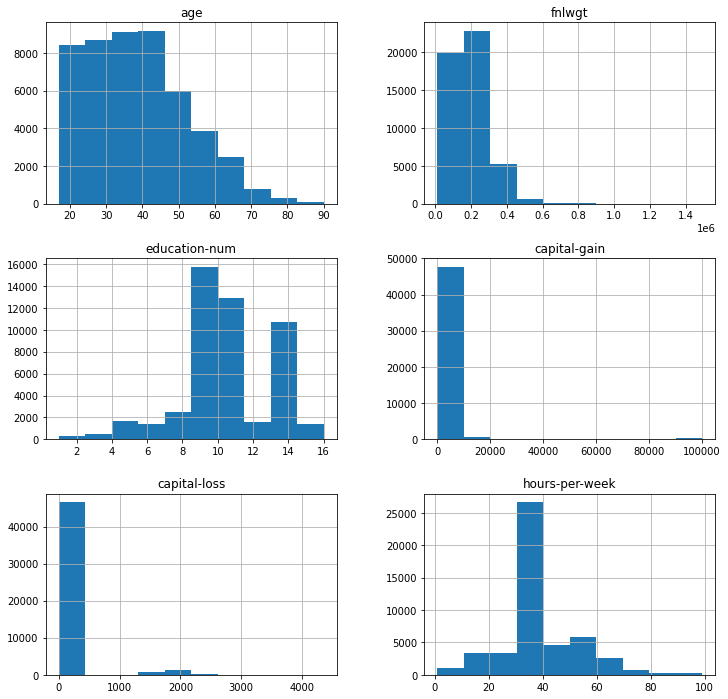

In [79]:
# Visualize numerical values distribution by histograms
rcParams['figure.figsize'] = 12, 12
df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

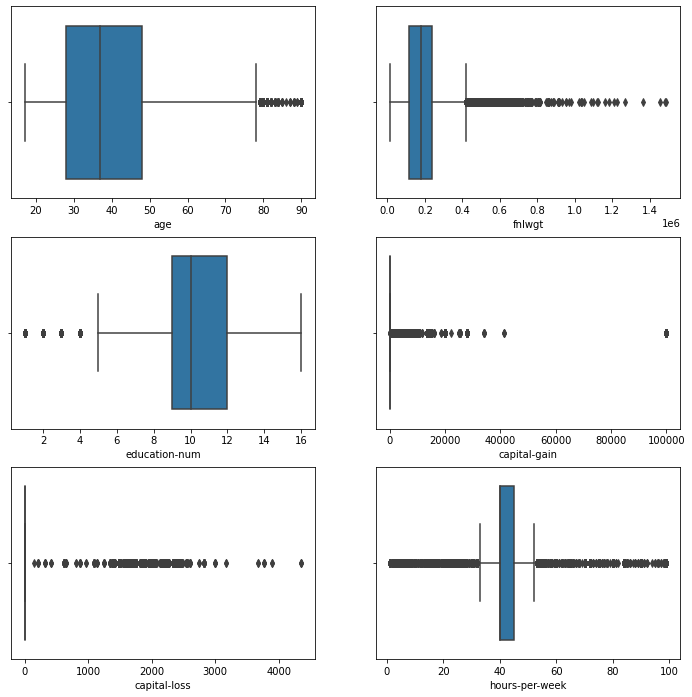

In [80]:
# Visualize numerical values distribution by boxplots

cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

for i in range(0,6):
    plt.subplot(3,2,i+1)         # Create subplots on a grid with 3 rows and 2 columns
    sns.boxplot(x=df[cols[i]])

plt.show()

By the histogram and boxplots analysis, observations who reported more than 80 hours worked per week or more than 80k as capital gain will be considered as outliers and removed.

# Preprocessing data

In the exploratory analysis step, we checked for outliers in countinuous variables and reported missing data. As the first step of the preprocessing operations, we will remove the missing data and outliers.

### Handling with missing data and outliers

First, let's replace variables reported as unknown values ("?") for NaN and then drop out the observations with NaN values.

In [81]:
# Replace variables reported as unknown values ("?") for NaN
df = df.replace('?', np.NaN)

In [82]:
df.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
matrial-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

In [83]:
# Remove missing data
df = df.dropna()
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
matrial-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [84]:
df.shape # 3620 observations removed

(45222, 15)

7.4% of the observations had missing values and were removed. After drop out missing values, the dataset has now 45222 observations.

Next, we will remove observations who reported worked hours per week greater than 80h and capital-gain greater than 80K.

In [85]:
# Remove outliers in the capital-gain variable
df_cg = df[df['capital-gain'] < 80000]

In [86]:
df_cg.shape # 229 observations removed

(44993, 15)

In [87]:
# Remove outliers in the hours-per-week variable
df_hpw = df_cg[df_cg['hours-per-week'] < 80]

In [88]:
df_hpw.shape #475 observations removed

(44518, 15)

1.58% of the observations were considered outliers and removed. After dropping out outliers, the dataset has now 44518 observations.

Below, we will correct typing errors in the income variable.


In [89]:
df = df_hpw

In [91]:
df = df.replace('<=50K.', '<=50K')
df = df.replace('>50K.', '>50K')

In [94]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### Feature Selection and Feature Engineering.

After removing outliers and missing data, our dataset has 44518 observarions and 14 features. In this step, we will check if all the 13 features are necessary to predict the income variable

In [96]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'matrial-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

The features "education" and "education-num" holds the same information but one is coded as years spent in school and the other is a categorical value with the highest degree obtained by a person. Let's keep just the feature "education-num".

The same redudancy are observed in the features "matrial-status" and "relationship", so let's keep just the "matrial-status" feature.

In [98]:
# Removing features
df = df.drop(['education', 'relationship'], axis = 1)

The feature "native-country" has some unbalanced labels that can be improved by grouping some items.

In [103]:
df['native-country'].value_counts(normalize=True)

United-States                 0.912777
Mexico                        0.020104
Philippines                   0.006222
Germany                       0.004335
Puerto-Rico                   0.003909
Canada                        0.003639
El-Salvador                   0.003302
India                         0.003190
Cuba                          0.002965
England                       0.002628
China                         0.002516
Jamaica                       0.002291
South                         0.002224
Italy                         0.002201
Dominican-Republic            0.002134
Japan                         0.001932
Guatemala                     0.001932
Vietnam                       0.001842
Poland                        0.001819
Columbia                      0.001797
Haiti                         0.001550
Portugal                      0.001370
Iran                          0.001258
Taiwan                        0.001191
Nicaragua                     0.001078
Greece                   

In [109]:
# Grouping labels into Asian countries
df['native-country'] = df['native-country'].replace(['Cambodia',
'India','Iran','Japan','Laos','Philippines','Taiwan','Thailand',
'Vietnam','Hong','China'],'Asian')

# Grouping labels into European countries
df['native-country'] = df['native-country'].replace(['England','France',
'Germany','Greece','Holand-Netherlands','Hungary','Ireland','Italy',
'Poland', 'Portugal','Scotland','Yugoslavia'],'European')

# Grouping labels into Latin-America countries
df['native-country'] = df['native-country'].replace(['Columbia','Cuba',
'Dominican-Republic','Ecuador','El-Salvador','Guatemala','Haiti',
'Honduras','Jamaica','Mexico','Nicaragua','Peru','Puerto-Rico','South',
'Trinadad&Tobago'],'Latin-America')

# Grouping Outlying-US(Guam-USVI-etc) as US
df['native-country'] = df['native-country'].replace('Outlying-US(Guam-USVI-etc)', 'United-States')

In [110]:
df['native-country'].value_counts(normalize=True)

United-States    0.913271
Latin-America    0.046273
Asian            0.020464
European         0.016353
Canada           0.003639
Name: native-country, dtype: float64